In [834]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [835]:
data = '/Users/leona/OneDrive/Documentos/GitHub/machine-learning-studies/final_exercise/recipeData.csv'

In [836]:
df = pd.read_csv(data, encoding='ISO-8859-1')

In [837]:
df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [838]:
df.shape

(73861, 23)

In [839]:
df['StyleID'].value_counts()

StyleID
7      11940
10      7581
134     2617
9       2277
4       2038
       ...  
99         6
16         6
127        5
164        2
73         2
Name: count, Length: 176, dtype: int64

In [840]:
for style, count in df['StyleID'].value_counts().items():
    if count < 1000:
        df = df[df['StyleID'] != style]
df['StyleID'].value_counts()

StyleID
7      11940
10      7581
134     2617
9       2277
4       2038
30      1753
86      1478
12      1268
92      1204
6       1152
175     1072
39      1044
Name: count, dtype: int64

In [841]:
df.shape

(35424, 23)

In [842]:
df.drop(columns=['URL', 'Name', 'BeerID', 'Style'], axis=1, inplace=True)

In [843]:
df.isna().sum()

StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       1300
Efficiency           0
MashThickness    14495
SugarScale           0
BrewMethod           0
PitchRate        19549
PrimaryTemp      11265
PrimingMethod    32534
PrimingAmount    33369
UserId           24556
dtype: int64

In [844]:
for i, e in df.isna().sum().items():
    if e > 20000:
        df.drop(i, axis=1, inplace=True)

In [845]:
df.isna().sum()

StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       1300
Efficiency           0
MashThickness    14495
SugarScale           0
BrewMethod           0
PitchRate        19549
PrimaryTemp      11265
dtype: int64

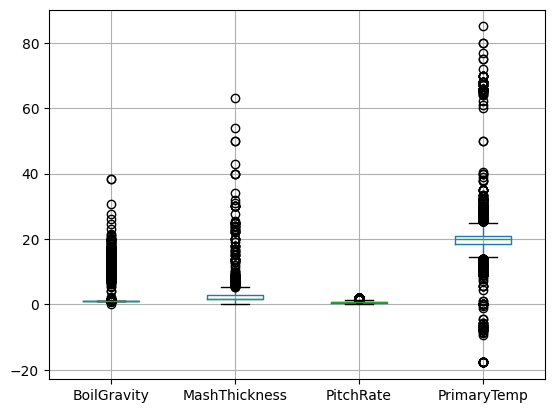

In [846]:
df.boxplot(column=['BoilGravity', 'MashThickness', 'PitchRate', 'PrimaryTemp'])
plt.show()

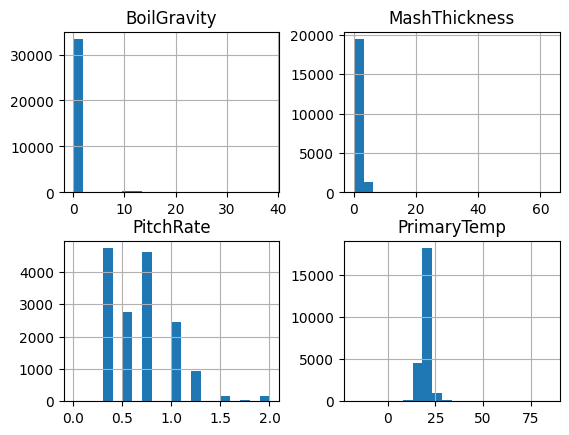

In [847]:
df.hist(column=['BoilGravity', 'MashThickness', 'PitchRate', 'PrimaryTemp'], bins=20)
plt.show()

In [848]:
df.fillna(df['PitchRate'].median(), inplace=True)
for column, has_na in df.isna().any().items():
    if has_na:
        df.fillna(df[column].mean(), inplace=True)

In [849]:
df.isna().sum()

StyleID          0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
MashThickness    0
SugarScale       0
BrewMethod       0
PitchRate        0
PrimaryTemp      0
dtype: int64

In [850]:
df.shape

(35424, 16)

In [851]:
display(df['SugarScale'].value_counts())
display(df['BrewMethod'].value_counts())

SugarScale
Specific Gravity    34605
Plato                 819
Name: count, dtype: int64

BrewMethod
All Grain       23594
BIAB             5779
extract          4377
Partial Mash     1674
Name: count, dtype: int64

In [852]:
df = pd.get_dummies(df, columns=['BrewMethod'], dtype=int)

In [853]:
df['SugarScale'] = df['SugarScale'].replace('Specific Gravity', 0)
df['SugarScale'] = df['SugarScale'].replace('Plato', 1)

C:\Users\leona\AppData\Local\Temp\ipykernel_35992\859535671.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SugarScale'] = df['SugarScale'].replace('Plato', 1)


In [854]:
df.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PitchRate,PrimaryTemp,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,0.750,70.0,0.75,0,0.75,0.75,0,0,0,1
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,0.750,70.0,0.75,0,0.75,0.75,1,0,0,0
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,0.75,0,1.00,0.75,1,0,0,0
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,0.750,75.0,0.75,0,0.75,0.75,1,0,0,0
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,0.75,0,0.75,21.11,1,0,0,0


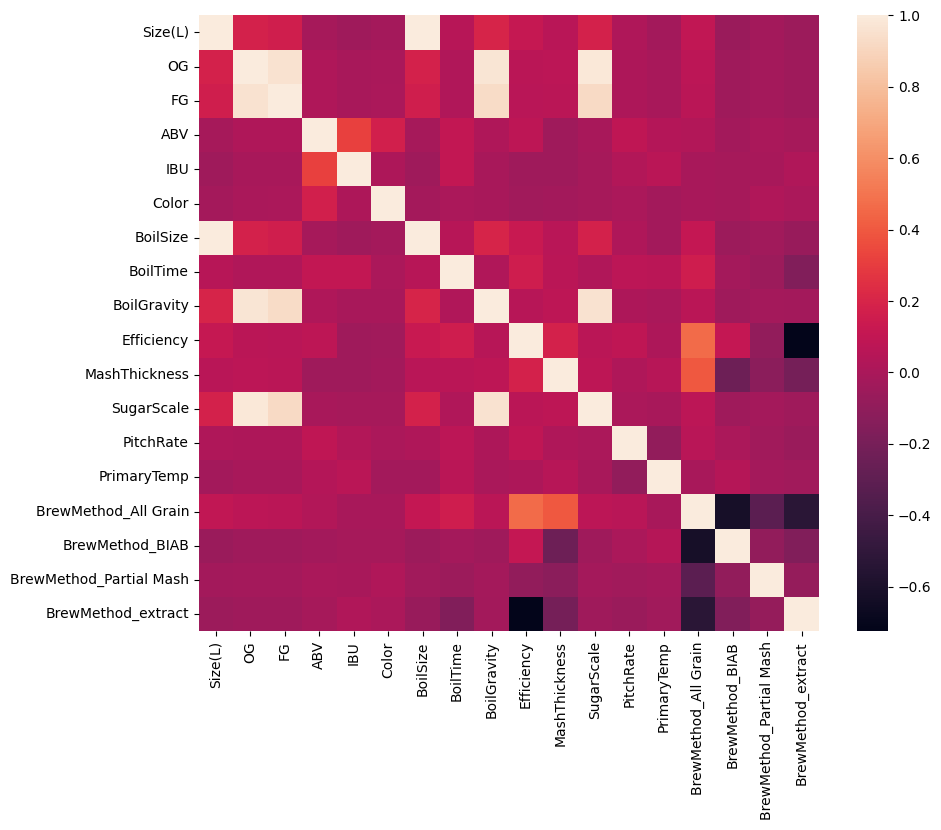

In [855]:
df1 = df.drop('StyleID', axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr())
plt.show()

In [856]:
numeric_cols = ['Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness', 'PrimaryTemp']

scaler = MinMaxScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [857]:
df.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PitchRate,PrimaryTemp,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
2,7,0.002939,0.002807,0.058665,0.108004,0.026968,0.082651,0.003364,0.250000,0.019531,0.70,0.011905,0,0.75,0.180288,0,0,0,1
3,7,0.003558,0.002718,0.058526,0.105994,0.024797,0.078233,0.003952,0.250000,0.019531,0.70,0.011905,0,0.75,0.180288,1,0,0,0
5,10,0.003870,0.002450,0.057966,0.101974,0.018261,0.073631,0.004392,0.291667,0.027266,0.79,0.011905,0,1.00,0.180288,1,0,0,0
6,86,0.003558,0.003208,0.058665,0.129569,0.122304,0.058260,0.004537,0.375000,0.019531,0.75,0.011905,0,0.75,0.180288,1,0,0,0
9,86,0.003249,0.003564,0.058526,0.150219,0.042338,0.076300,0.004244,0.250000,0.027552,0.70,0.011905,0,0.75,0.378381,1,0,0,0
